In [1]:
import pandas as pd

df = pd.read_csv("Fake_Real_Data.csv")
df.head(5)

,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real


In [3]:
df.shape

(9900, 2)

In [5]:
df.label.value_counts()

label
Fake    5000
Real    4900
Name: count, dtype: int64

In [7]:
df['label_nm'] = df['label'].map({'Fake':0, 'Real':1})
df.head()

,Text,label,label_nm
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0
1,U.S. conservative leader optimistic of common ...,Real,1
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0
4,Democrats say Trump agrees to work on immigrat...,Real,1


In [11]:
import spacy
nlp = spacy.load("en_core_web_lg")

In [13]:
doc = nlp("Top Trump Surrogate BRUTALLY Stabs Him")
doc.vector.shape

(300,)

In [17]:
# This will take more time i.e. 15 min
df['vector'] = df['Text'].apply(lambda text:nlp(text).vector)

In [20]:
df.head()

,Text,label,label_nm,vector
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0,"[-0.103623025, 0.17802684, -0.11873861, -0.034..."
1,U.S. conservative leader optimistic of common ...,Real,1,"[-0.0063406364, 0.16712041, -0.06661373, 0.017..."
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1,"[-0.122753024, 0.17192385, -0.024732638, -0.06..."
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0,"[-0.027337318, 0.12501417, -0.0073965387, -0.0..."
4,Democrats say Trump agrees to work on immigrat...,Real,1,"[-0.032708026, 0.093958504, -0.03287002, -0.00..."


In [32]:
print(df.columns)

Index(['Text', 'label', 'label_nm', 'vector', 'label_num'], dtype='object')


In [34]:
from sklearn.model_selection import train_test_split

# Ensure 'label_num' exists
if 'label_num' not in df.columns:
    df['label_num'] = df['label'].astype('category').cat.codes

# Now split the data
X_train, X_test, y_train, y_test = train_test_split(
    df.vector.values,
    df.label_num,
    test_size=0.2,
    random_state=2022
)


In [36]:
X_train

array([array([-2.37034578e-02,  1.48199528e-01, -5.90629913e-02, -3.08816023e-02,
               7.27375224e-02, -3.08532882e-02, -3.06985099e-02, -1.34581909e-01,
              -2.89440658e-02,  2.11217093e+00, -2.11404130e-01, -1.30848298e-02,
               9.76289958e-02, -8.72511789e-02, -1.27175421e-01, -7.87014738e-02,
              -4.45573106e-02,  8.96639585e-01, -7.74146467e-02, -1.98509209e-02,
              -4.66989167e-03,  3.00393123e-02, -5.44604585e-02, -3.01919542e-02,
               2.35033669e-02,  4.78319898e-02, -1.07414149e-01, -4.99117828e-04,
               6.58109086e-03, -7.65082892e-03,  2.21302323e-02,  3.81453149e-02,
               2.45294645e-02,  8.50784853e-02,  4.57540490e-02, -2.83517223e-02,
              -2.62076780e-02,  9.25419573e-03, -4.42117751e-02, -1.07683197e-01,
               9.35755111e-03,  6.35481179e-02,  5.63387387e-02, -6.61794245e-02,
               1.34266177e-02,  1.39213279e-02, -8.35610852e-02, -3.96741964e-02,
               2

In [38]:
X_train.shape

(7920,)

In [40]:
import numpy as np

X_train_2d = np.stack(X_train)     # stack is used of 2d array menas matrix type
X_test_2d = np.stack(X_test)

In [42]:
X_train_2d

array([[-0.02370346,  0.14819953, -0.05906299, ..., -0.06582212,
        -0.05378761,  0.08668853],
       [-0.01595326,  0.15394837, -0.10800642, ..., -0.03003666,
        -0.04334445,  0.03076661],
       [-0.04449651,  0.11169833, -0.04756551, ..., -0.10499363,
        -0.00837316,  0.06351685],
       ...,
       [ 0.02167883,  0.12635042, -0.01003216, ..., -0.08063941,
        -0.06881595,  0.04882506],
       [-0.07091133,  0.08315557, -0.06580248, ..., -0.06301989,
         0.02095402,  0.09888683],
       [-0.08993341,  0.14425951, -0.14141384, ..., -0.03444797,
         0.02387965,  0.06281336]], dtype=float32)

In [48]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_train_embed = scaler.fit_transform(X_train_2d)
scaled_test_embed = scaler.fit_transform(X_test_2d)

clf = MultinomialNB()
clf.fit(scaled_train_embed, y_train)

MultinomialNB()

In [60]:
from sklearn.metrics import classification_report

# After you have trained your classifier and made predictions
y_pred = clf.predict(scaled_test_embed)

# Print classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1024
           1       0.97      0.93      0.95       956

    accuracy                           0.95      1980
   macro avg       0.95      0.95      0.95      1980
weighted avg       0.95      0.95      0.95      1980



In [62]:
from sklearn.neighbors import KNeighborsClassifier

#1. creating a KNN model object
clf = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')

#2. fit with all_train_embeddings and y_train
clf.fit(X_train_2d, y_train)

#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = clf.predict(X_test_2d)

#4. print the classfication report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1024
           1       0.97      0.99      0.98       956

    accuracy                           0.98      1980
   macro avg       0.98      0.98      0.98      1980
weighted avg       0.98      0.98      0.98      1980



Text(95.72222222222221, 0.5, 'Truth')

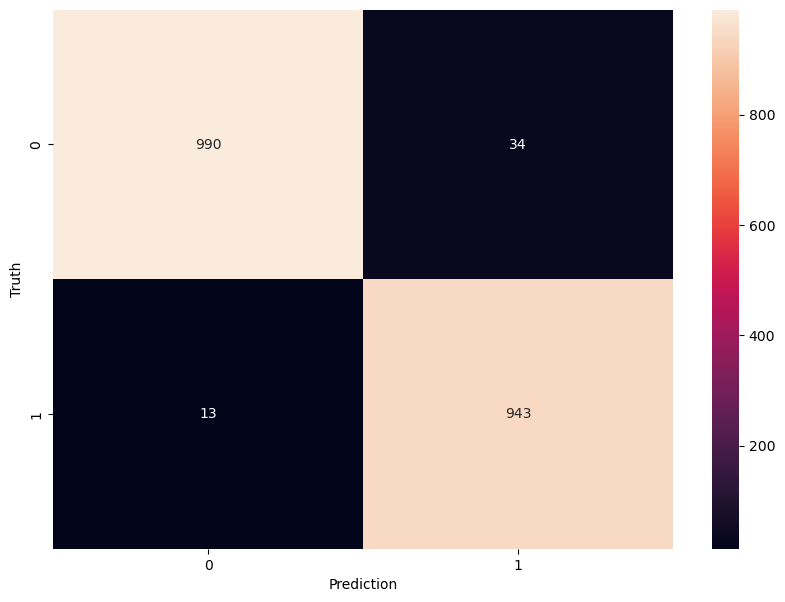

In [64]:
#finally print the confusion matrix for the best model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')
